In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from keras.optimizers import Adam

In [12]:
# Loading the data

X_labeled = np.load("Xtrain1.npy")
X_unlabeled = np.load("Xtrain1_extra.npy")
Y_train = np.load("Ytrain1.npy")
X_test = np.load("Xtest1.npy")

(2783, 2304)
(904, 2304)
[112 158 145 ...  84  96  99]
[[112 158 145 ... 122 130 137]
 [136 124 117 ... 108 111 121]
 [122 118 112 ... 141 156 139]
 ...
 [112 117 118 ... 139 122 112]
 [123 104 113 ... 108 108 113]
 [106 142 118 ...  84  96  99]]


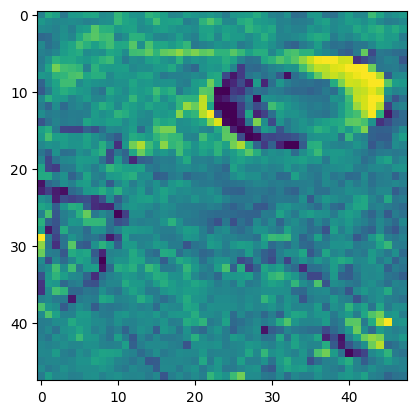

In [13]:
print(X_labeled.shape)
print(X_unlabeled.shape)

resized = np.resize(X_labeled[1], [48,48])
#print(resized.shape)
print(X_labeled[1])
print(resized)
resized_trans = np.transpose(resized)
#plt.imshow(resized_trans)

plt.imshow(resized)


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,073 (1.35 MB)

 Trainable params: 355,073 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
 7/89 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5315 - loss: 0.6910

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5303 - loss: 0.6872 - val_accuracy: 0.6414 - val_loss: 0.6607
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6887 - loss: 0.6484 - val_accuracy: 0.7271 - val_loss: 0.6038
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7297 - loss: 0.5648 - val_accuracy: 0.7398 - val_loss: 0.6513
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7545 - loss: 0.5267 - val_accuracy: 0.7229 - val_loss: 0.7236
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7817 - loss: 0.4892 - val_accuracy: 0.7314 - val_loss: 0.7226
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7981 - loss: 0.4489 - val_accuracy: 0.7595 - val_loss: 0.6280
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8077 - loss: 0.4515 - val_accuracy: 0.7440 - val_loss: 0.6894
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8098 - loss: 0.4400 - val_accuracy: 0.7595 - val_loss: 0.

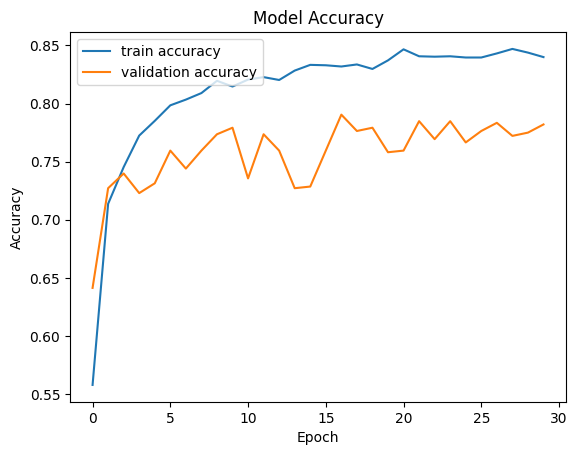

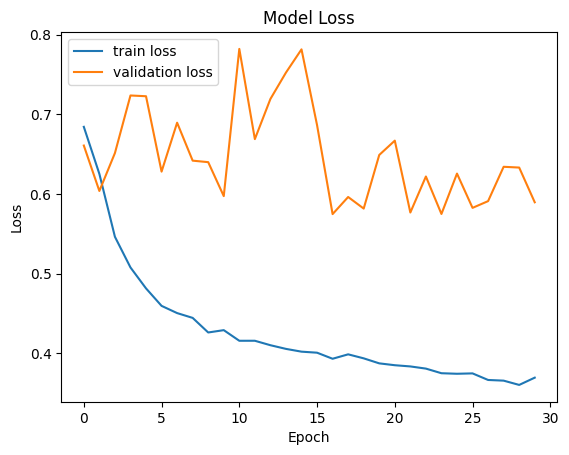

In [14]:
# Preprocessing: Normalize the images (values between 0 and 1)
X_labeled_norm = X_labeled / 255.0

# USING OVERSAMPLER - if needed, uncoment the following lines to use RandomOverSampler

# #Add an extra dimension to X to indicate grayscale channel (1 channel for grayscale)
# X_train_exp = np.expand_dims(X_train_norm, axis=-1)

# # Handle class imbalance using RandomOverSampler
# ros = RandomOverSampler(sampling_strategy='minority')
# X_resampled, y_resampled = ros.fit_resample(X_train_exp.reshape((X_train_exp.shape[0], -1)), Y_train)
# X_resampled = X_resampled.reshape((-1, 48, 48, 1))

# # Split data into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# USING SMOTE - if needed, uncoment the following lines to use SMOTE

# Reshape the data to add channel dimension (grayscale images)
X_new = X_labeled_norm.reshape(X_labeled_norm.shape[0], 48, 48, 1)

# Flatten X for SMOTE (since SMOTE expects 2D data, we will reshape it back after)
X_flattened = X_new.reshape((X_new.shape[0], -1))

# Apply SMOTE to the dataset
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_flattened, Y_train)

# Reshape X back to the original 4D shape (number of samples, 48, 48, 1)
X_resampled = X_resampled.reshape((X_resampled.shape[0], 48, 48, 1))

# Split into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Build CNN model
def create_model():
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening
    model.add(Flatten())

    # Fully connected layer with dropout
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (binary classification)
    model.add(Dense(1, activation='sigmoid'))
    adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    # Compile the model
    model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create and summarize the model
model = create_model()
model.summary()

# Train the model
batch_size = 32
epochs = 30

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model
val_preds = model.predict(X_val)
val_preds = np.round(val_preds)

# Classification report
print(classification_report(y_val, val_preds))

# F1 Score
f1 = f1_score(y_val, val_preds)
print("F1 Score: ", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, val_preds)
print("Confusion Matrix:\n", conf_matrix)

# Plotting training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Using the unlabeled data

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,073 (1.35 MB)

 Trainable params: 355,073 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
 7/89 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5076 - loss: 0.6982

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5421 - loss: 0.6900 - val_accuracy: 0.5781 - val_loss: 0.6543
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6919 - loss: 0.6328 - val_accuracy: 0.6765 - val_loss: 0.6831
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7445 - loss: 0.5343 - val_accuracy: 0.6484 - val_loss: 0.7462
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7689 - loss: 0.5104 - val_accuracy: 0.7060 - val_loss: 0.6588
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7678 - loss: 0.4915 - val_accuracy: 0.7229 - val_loss: 0.6222
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7800 - loss: 0.4636 - val_accuracy: 0.7764 - val_loss: 0.5043
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7986 - loss: 0.4481 - val_accuracy: 0.7328 - val_loss: 0.6233
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8049 - loss: 0.4417 - val_accuracy: 0.7764 - val_loss: 0.

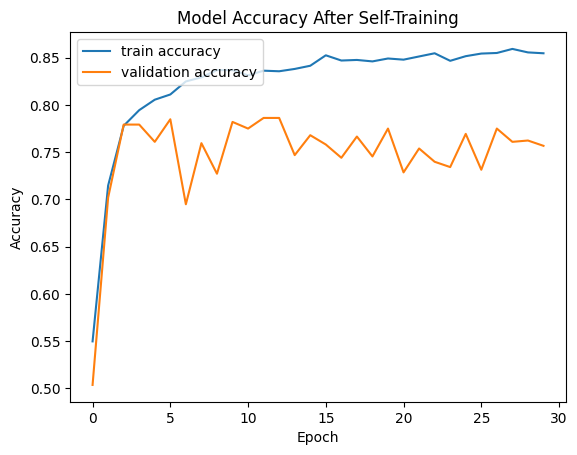

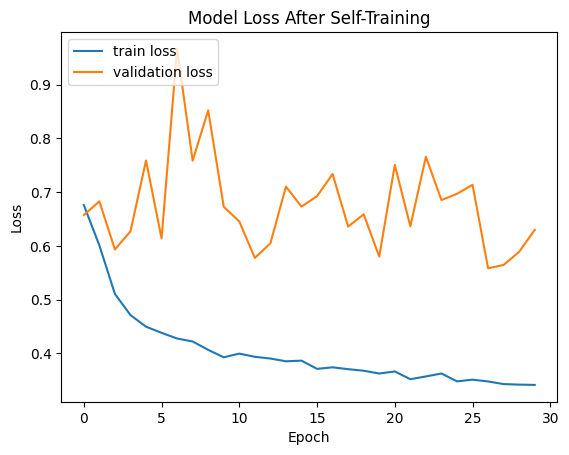

In [15]:
# Normalize the unlabeled data (values between 0 and 1)
X_unlabeled_norm = X_unlabeled / 255.0
X_unlabeled_norm = X_unlabeled_norm.reshape(X_unlabeled_norm.shape[0], 48, 48, 1)

# Train the CNN model on labeled data first (the code you already have)

model = create_model()
model.summary()

batch_size = 32
epochs = 30

# Train the model on the labeled dataset
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Step 1: Use the trained CNN model to generate pseudo-labels for the unlabeled data
# Get predictions for the unlabeled data
unlabeled_preds = model.predict(X_unlabeled_norm)

# Step 2: Apply a threshold to assign pseudo-labels based on prediction confidence
# For binary classification, pseudo-labels are 0 or 1 depending on confidence
pseudo_labels = np.where(unlabeled_preds > 0.9, 1, np.where(unlabeled_preds < 0.1, 0, -1))

# Only keep confident predictions (those with pseudo-labels not equal to -1)
confident_indices = np.where(pseudo_labels != -1)[0]
X_confident = X_unlabeled_norm[confident_indices]
pseudo_labels_confident = pseudo_labels[confident_indices]
# Reshape pseudo_labels_confident if needed
pseudo_labels_confident = pseudo_labels_confident.ravel()


# Step 3: Combine the original labeled data with the pseudo-labeled confident data
X_combined = np.concatenate((X_train, X_confident), axis=0)
y_combined = np.concatenate((y_train, pseudo_labels_confident), axis=0)

print(X_combined.shape)
print(X_combined)

# Step 4: Retrain the model using the combined labeled + pseudo-labeled data
model = create_model()  # Recreate the model to retrain
history_combined = model.fit(
    datagen.flow(X_combined, y_combined, batch_size=batch_size),
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Step 5: Evaluate the model
val_preds = model.predict(X_val)
val_preds = np.round(val_preds)

# Classification report
print(classification_report(y_val, val_preds))

# F1 Score
f1 = f1_score(y_val, val_preds)
print("F1 Score after self-training: ", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, val_preds)
print("Confusion Matrix after self-training:\n", conf_matrix)

# Step 6: Plotting training history for combined data
plt.plot(history_combined.history['accuracy'], label='train accuracy')
plt.plot(history_combined.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy After Self-Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history_combined.history['loss'], label='train loss')
plt.plot(history_combined.history['val_loss'], label='validation loss')
plt.title('Model Loss After Self-Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


With CV

Training on Fold 1...
Epoch 1/20


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/88 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5274 - loss: 0.6935

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5188 - loss: 0.6908 - val_accuracy: 0.7056 - val_loss: 0.6419
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6194 - loss: 0.6703 - val_accuracy: 0.7899 - val_loss: 0.5583
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6923 - loss: 0.6247 - val_accuracy: 0.7702 - val_loss: 0.5148
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7214 - loss: 0.5765 - val_accuracy: 0.7899 - val_loss: 0.5042
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7501 - loss: 0.5403 - val_accuracy: 0.8079 - val_loss: 0.4543
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7397 - loss: 0.5535 - val_accuracy: 0.7864 - val_loss: 0.5344
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7774 - loss: 0.5145 - val_accuracy: 0.7935 - val_loss: 0.4886
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7858 - loss: 0.4924 - val_accuracy: 0.8115 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/89 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5226 - loss: 0.6924

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5099 - loss: 0.6904 - val_accuracy: 0.7379 - val_loss: 0.6571
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6301 - loss: 0.6679 - val_accuracy: 0.7433 - val_loss: 0.5680
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7003 - loss: 0.6073 - val_accuracy: 0.7612 - val_loss: 0.5693
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7259 - loss: 0.5713 - val_accuracy: 0.7720 - val_loss: 0.5556
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7482 - loss: 0.5320 - val_accuracy: 0.7648 - val_loss: 0.6135
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7712 - loss: 0.5077 - val_accuracy: 0.7684 - val_loss: 0.5931
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7525 - loss: 0.5331 - val_accuracy: 0.7864 - val_loss: 0.5613
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7866 - loss: 0.4869 - val_accuracy: 0.7738 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/90 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5097 - loss: 0.6911

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4973 - loss: 0.6932 - val_accuracy: 0.6302 - val_loss: 0.6605
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5380 - loss: 0.6812 - val_accuracy: 0.6697 - val_loss: 0.6053
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6859 - loss: 0.6408 - val_accuracy: 0.7540 - val_loss: 0.5577
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7008 - loss: 0.6007 - val_accuracy: 0.7469 - val_loss: 0.5924
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7272 - loss: 0.5697 - val_accuracy: 0.7828 - val_loss: 0.5615
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7389 - loss: 0.5673 - val_accuracy: 0.7917 - val_loss: 0.5440
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7728 - loss: 0.5259 - val_accuracy: 0.7576 - val_loss: 0.6137
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7673 - loss: 0.5234 - val_accuracy: 0.7702 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/90 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5056 - loss: 0.6910

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5154 - loss: 0.6922 - val_accuracy: 0.7266 - val_loss: 0.6830
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5739 - loss: 0.6856 - val_accuracy: 0.6924 - val_loss: 0.6340
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6599 - loss: 0.6505 - val_accuracy: 0.6655 - val_loss: 0.6450
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6933 - loss: 0.5993 - val_accuracy: 0.7194 - val_loss: 0.6118
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7273 - loss: 0.5734 - val_accuracy: 0.7302 - val_loss: 0.6155
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7383 - loss: 0.5539 - val_accuracy: 0.7032 - val_loss: 0.6693
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7432 - loss: 0.5376 - val_accuracy: 0.7788 - val_loss: 0.5528
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7387 - loss: 0.5359 - val_accuracy: 0.7878 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/89 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4772 - loss: 0.6942

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4994 - loss: 0.6931 - val_accuracy: 0.7104 - val_loss: 0.6761
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5846 - loss: 0.6838 - val_accuracy: 0.6942 - val_loss: 0.6038
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6695 - loss: 0.6529 - val_accuracy: 0.6888 - val_loss: 0.6173
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6886 - loss: 0.6161 - val_accuracy: 0.7590 - val_loss: 0.5452
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7217 - loss: 0.5806 - val_accuracy: 0.7554 - val_loss: 0.5779
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7562 - loss: 0.5506 - val_accuracy: 0.7680 - val_loss: 0.5751
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7499 - loss: 0.5414 - val_accuracy: 0.7932 - val_loss: 0.5315
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7545 - loss: 0.5244 - val_accuracy: 0.8076 - val_loss: 0.

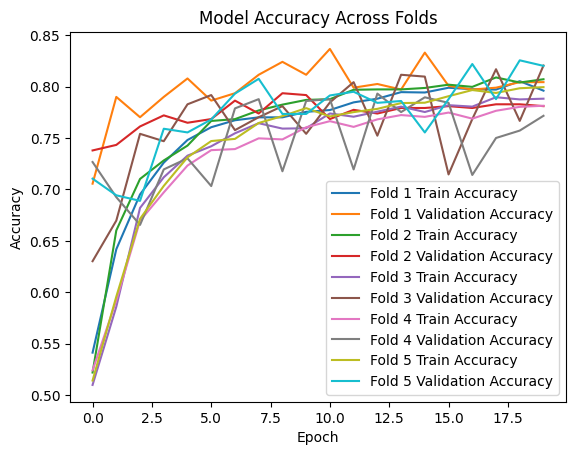

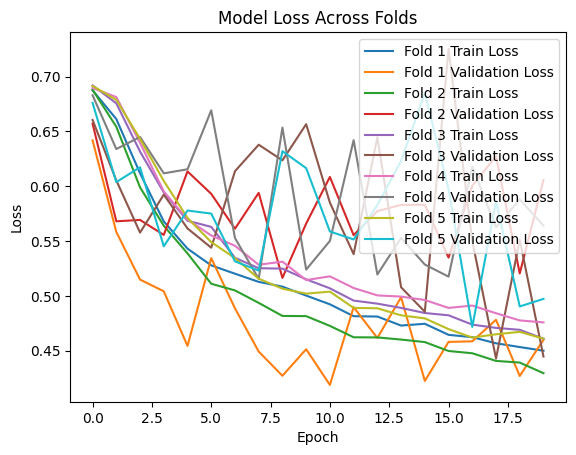

In [16]:
# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Initialize lists to store metrics
f1_scores = []
histories = []

# Perform K-Fold Cross-Validation
fold = 1
for train_index, val_index in kf.split(X_labeled_norm):
    print(f"Training on Fold {fold}...")
    
    # Split the data into training and validation sets
    X_train, X_val = X_labeled_norm[train_index], X_labeled_norm[val_index]
    y_train, y_val = Y_train[train_index], Y_train[val_index]
    
    # Flatten the training data for RandomOverSampling
    X_train_flattened = X_train.reshape((X_train.shape[0], -1))
    
    # Apply RandomOverSampling to balance the training data
    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flattened, y_train)
    
    # Reshape the resampled data back to image shape
    X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], 48, 48, 1))
    
    # Shuffle the resampled training data
    X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)
    
    # Create a new CNN model for each fold
    model = create_model()

    # Train the model with data augmentation
    history = model.fit(
        datagen.flow(X_train_resampled, y_train_resampled, batch_size=32), #if data augmentation is before data split
        validation_data=(X_val.reshape(X_val.shape[0], 48, 48, 1), y_val),  # Ensure X_val has shape (48, 48, 1)
        epochs=20
    )
    
    # Append the training history for later analysis
    histories.append(history.history)
    
    # Evaluate the model
    val_preds = model.predict(X_val.reshape(X_val.shape[0], 48, 48, 1))
    val_preds = np.round(val_preds)  # Convert probabilities to binary 0 or 1

    # Calculate and store the F1 score
    f1 = f1_score(y_val, val_preds)
    f1_scores.append(f1)

    print(f"F1 Score for Fold {fold}: {f1}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, val_preds)
    print(f"Confusion Matrix for Fold {fold}:\n", conf_matrix)

    # Increment fold number
    fold += 1

# Print average F1 score
print(f"\nAverage F1 Score: {np.mean(f1_scores)}")

# Plot accuracy and loss curves
for i, history in enumerate(histories):
    plt.plot(history['accuracy'], label=f'Fold {i+1} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'Fold {i+1} Validation Accuracy')
plt.title('Model Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

for i, history in enumerate(histories):
    plt.plot(history['loss'], label=f'Fold {i+1} Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {i+1} Validation Loss')
plt.title('Model Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Using CV and the new training set (labeled +  labeled through self-learning)

Training on Fold 1...
Epoch 1/20


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/89 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4760 - loss: 0.6931

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4986 - loss: 0.6931 - val_accuracy: 0.4531 - val_loss: 0.6994
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4930 - loss: 0.6932 - val_accuracy: 0.4531 - val_loss: 0.7007
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4924 - loss: 0.6932 - val_accuracy: 0.4531 - val_loss: 0.7007
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.4531 - val_loss: 0.6995
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4967 - loss: 0.6932 - val_accuracy: 0.5177 - val_loss: 0.6922
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4937 - loss: 0.6932 - val_accuracy: 0.4147 - val_loss: 0.6938
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4933 - loss: 0.6932 - val_accuracy: 0.5469 - val_loss: 0.6879
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5139 - loss: 0.6931 - val_accuracy: 0.5469 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/88 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5528 - loss: 0.6931

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5591 - val_loss: 0.6857
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4752 - loss: 0.6932 - val_accuracy: 0.5591 - val_loss: 0.6858
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5081 - loss: 0.6931 - val_accuracy: 0.5591 - val_loss: 0.6766
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4926 - loss: 0.6931 - val_accuracy: 0.5591 - val_loss: 0.6759
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.5591 - val_loss: 0.6776
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4917 - loss: 0.6932 - val_accuracy: 0.5591 - val_loss: 0.6818
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5006 - loss: 0.6931 - val_accuracy: 0.5591 - val_loss: 0.6796
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5006 - loss: 0.6931 - val_accuracy: 0.5591 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/90 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5096 - loss: 0.6931

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5047 - loss: 0.6932 - val_accuracy: 0.4946 - val_loss: 0.6921
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5146 - val_loss: 0.6889
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4781 - loss: 0.6932 - val_accuracy: 0.5146 - val_loss: 0.6892
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5085 - loss: 0.6931 - val_accuracy: 0.5146 - val_loss: 0.6874
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.5146 - val_loss: 0.6874
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4636 - loss: 0.6932 - val_accuracy: 0.5146 - val_loss: 0.6894
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 0.5146 - val_loss: 0.7185
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5146 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/89 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4730 - loss: 0.6931

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4971 - loss: 0.6931 - val_accuracy: 0.5422 - val_loss: 0.6878
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4752 - loss: 0.6932 - val_accuracy: 0.5422 - val_loss: 0.6836
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4925 - loss: 0.6932 - val_accuracy: 0.5422 - val_loss: 0.6828
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4946 - loss: 0.6932 - val_accuracy: 0.5422 - val_loss: 0.6823
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4980 - loss: 0.6931 - val_accuracy: 0.5422 - val_loss: 0.7003
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4961 - loss: 0.6930 - val_accuracy: 0.5422 - val_loss: 0.7609
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5002 - loss: 0.6931 - val_accuracy: 0.5422 - val_loss: 0.8488
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.5422 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/88 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4207 - loss: 0.6932

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4848 - loss: 0.6932 - val_accuracy: 0.5515 - val_loss: 0.6835
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5203 - loss: 0.6930 - val_accuracy: 0.5515 - val_loss: 0.6860
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4658 - loss: 0.6933 - val_accuracy: 0.5392 - val_loss: 0.6929
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4886 - loss: 0.6932 - val_accuracy: 0.5238 - val_loss: 0.6911
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5128 - loss: 0.6931 - val_accuracy: 0.5561 - val_loss: 0.6893
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5303 - loss: 0.6931 - val_accuracy: 0.5269 - val_loss: 0.6935
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5107 - loss: 0.6931 - val_accuracy: 0.5161 - val_loss: 0.6909
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5018 - loss: 0.6932 - val_accuracy: 0.4531 - val_loss: 0.

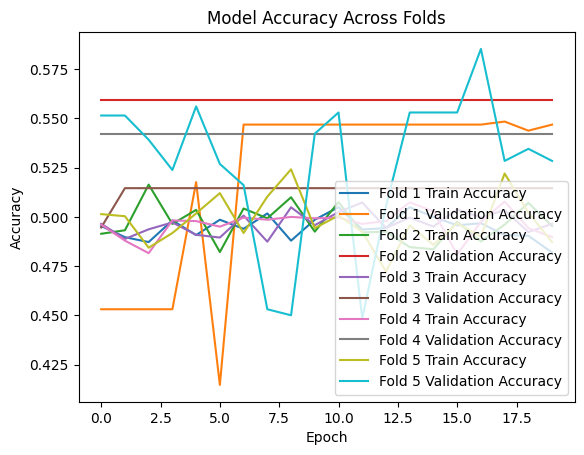

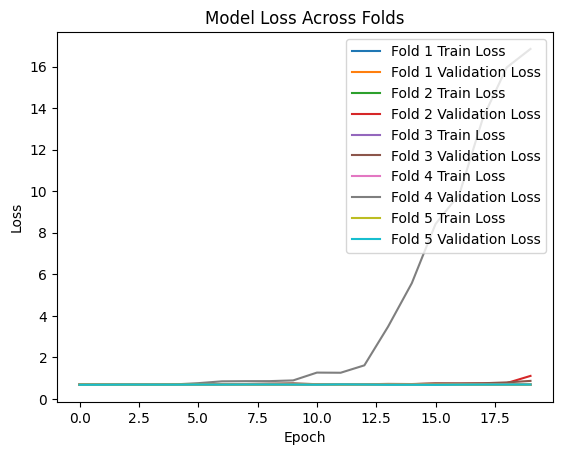

In [23]:
# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Initialize lists to store metrics
f1_scores = []
histories = []

# Perform K-Fold Cross-Validation
fold = 1
for train_index, val_index in kf.split(X_combined):
    print(f"Training on Fold {fold}...")
    
    # Split the data into training and validation sets
    X_train, X_val = X_combined[train_index], X_combined[val_index]
    y_train, y_val = y_combined[train_index], y_combined[val_index]
    
    # Flatten the training data for RandomOverSampling
    X_train_flattened = X_train.reshape((X_train.shape[0], -1))
    
    # Apply RandomOverSampling to balance the training data
    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flattened, y_train)
    
    # Reshape the resampled data back to image shape
    X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], 48, 48, 1))
    
    # Shuffle the resampled training data
    X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)
    
    # Create a new CNN model for each fold
    model = create_model()

    # Train the model with data augmentation
    history = model.fit(
        datagen.flow(X_train_resampled, y_train_resampled, batch_size=32), #if data augmentation is before data split
        validation_data=(X_val.reshape(X_val.shape[0], 48, 48, 1), y_val),  # Ensure X_val has shape (48, 48, 1)
        epochs=20
    )
    
    # Append the training history for later analysis
    histories.append(history.history)
    
    # Evaluate the model
    val_preds = model.predict(X_val.reshape(X_val.shape[0], 48, 48, 1))
    val_preds = np.round(val_preds)  # Convert probabilities to binary 0 or 1

    # Calculate and store the F1 score
    f1 = f1_score(y_val, val_preds)
    f1_scores.append(f1)

    print(f"F1 Score for Fold {fold}: {f1}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, val_preds)
    print(f"Confusion Matrix for Fold {fold}:\n", conf_matrix)

    # Increment fold number
    fold += 1

# Print average F1 score
print(f"\nAverage F1 Score: {np.mean(f1_scores)}")

# Plot accuracy and loss curves
for i, history in enumerate(histories):
    plt.plot(history['accuracy'], label=f'Fold {i+1} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'Fold {i+1} Validation Accuracy')
plt.title('Model Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

for i, history in enumerate(histories):
    plt.plot(history['loss'], label=f'Fold {i+1} Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {i+1} Validation Loss')
plt.title('Model Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Using a CNN for feature extraction and training the model with a DNN

Training on Fold 1...
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4841 - loss: 0.6988 - val_accuracy: 0.7487 - val_loss: 0.6893
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5257 - loss: 0.6903 - val_accuracy: 0.7002 - val_loss: 0.6843
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5467 - loss: 0.6860 - val_accuracy: 0.7792 - val_loss: 0.6603
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5836 - loss: 0.6757 - val_accuracy: 0.3842 - val_loss: 0.7091
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5843 - loss: 0.6712 - val_accuracy: 0.6409 - val_loss: 0.6566
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6587 - loss: 0.6460 - val_accuracy: 0.6679 - val_loss: 0.6439
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6439 - loss: 0.6412 - val_accuracy: 0.6643 - val_loss: 0.6347
Epoch 8/30
88/88 ━

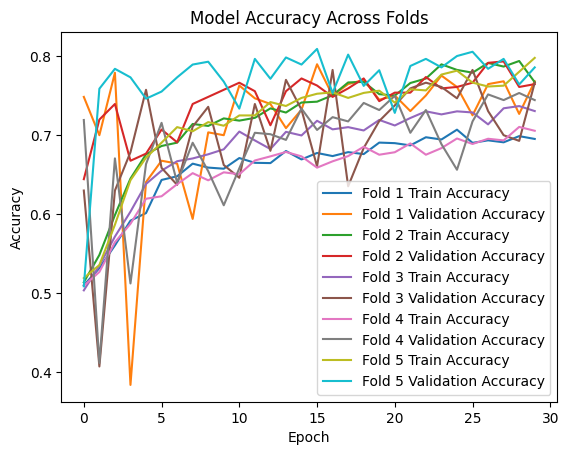

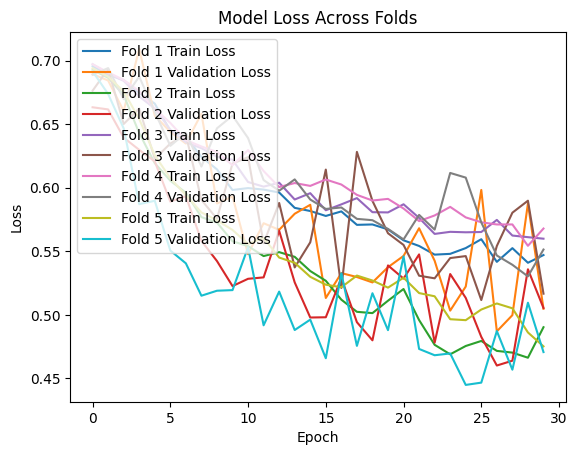

In [18]:
# Load the data (replace with actual loading code)
X = np.load('Xtrain1.npy')  
y = np.load('Ytrain1.npy')  

# Preprocessing: Normalize images (pixel values between 0 and 1)
X = X / 255.0

# Reshape the data to add channel dimension (grayscale images)
X = X.reshape(X.shape[0], 48, 48, 1)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Initialize lists to store metrics
f1_scores = []
histories = []

# Data augmentation using ImageDataGenerator for CNN training
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)

# Build the CNN feature extractor model
def create_cnn_feature_extractor():
    inputs = Input(shape=(48, 48, 1))
    
    # Convolutional Layer 1
    x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Layer 2
    x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Layer 3
    x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Flattening
    x = Flatten()(x)

    return Model(inputs, x)

# Build the DNN model
def create_dnn(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    
    return Model(inputs, outputs)

# Perform K-Fold Cross-Validation
fold = 1
for train_index, val_index in kf.split(X):
    print(f"Training on Fold {fold}...")
    
    # Split the data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Flatten the training data for RandomOverSampling
    X_train_flattened = X_train.reshape((X_train.shape[0], -1))
    
    # Apply RandomOverSampling to balance the training data
    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flattened, y_train)
    
    # Reshape the resampled data back to image shape
    X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], 48, 48, 1))
    
    # Shuffle the resampled training data
    X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)
    
    # Create CNN feature extractor
    cnn_feature_extractor = create_cnn_feature_extractor()
    cnn_features_train = cnn_feature_extractor.predict(X_train_resampled)
    cnn_features_val = cnn_feature_extractor.predict(X_val.reshape(X_val.shape[0], 48, 48, 1))
    
    # Ensure that the features are flattened before feeding to DNN
    cnn_features_train = cnn_features_train.reshape((cnn_features_train.shape[0], -1))  # Flatten the features
    cnn_features_val = cnn_features_val.reshape((cnn_features_val.shape[0], -1))  # Flatten the features
    
    # Create the DNN model
    dnn_model = create_dnn(cnn_features_train.shape[1:])
    
    # Compile the DNN model
    dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the DNN model without data augmentation
    history = dnn_model.fit(
        cnn_features_train, y_train_resampled,
        validation_data=(cnn_features_val, y_val),
        epochs=30,
        batch_size=32
    )
    
    # Append the training history for later analysis
    histories.append(history.history)
    
    # Evaluate the DNN model
    val_preds = dnn_model.predict(cnn_features_val)
    val_preds = np.round(val_preds)  # Convert probabilities to binary 0 or 1

    # Calculate and store the F1 score
    f1 = f1_score(y_val, val_preds)
    f1_scores.append(f1)

    print(f"F1 Score for Fold {fold}: {f1}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, val_preds)
    print(f"Confusion Matrix for Fold {fold}:\n", conf_matrix)

    # Increment fold number
    fold += 1

# Print average F1 score
print(f"\nAverage F1 Score: {np.mean(f1_scores)}")

# Plot accuracy and loss curves
for i, history in enumerate(histories):
    plt.plot(history['accuracy'], label=f'Fold {i+1} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'Fold {i+1} Validation Accuracy')
plt.title('Model Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

for i, history in enumerate(histories):
    plt.plot(history['loss'], label=f'Fold {i+1} Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {i+1} Validation Loss')
plt.title('Model Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Training on Fold 1...
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5233 - loss: 0.6903 - val_accuracy: 0.6697 - val_loss: 0.6602
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6105 - loss: 0.6668 - val_accuracy: 0.7097 - val_loss: 0.6057
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7162 - loss: 0.5940 - val_accuracy: 0.7880 - val_loss: 0.5038
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7712 - loss: 0.5160 - val_accuracy: 0.7957 - val_loss: 0.4652
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7854 - loss: 0.4877 - val_accuracy: 0.8003 - val_loss: 0.4535
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7789 - loss: 0.4913 - val_accuracy: 0.8111 - val_loss: 0.4261
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7878 - loss: 0.4614 - val_accuracy: 0.8187 - val_loss: 0.4179
Epoch 8/30
89/89 ━

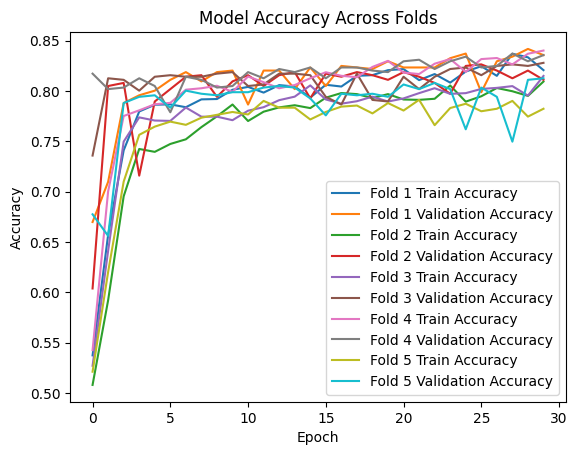

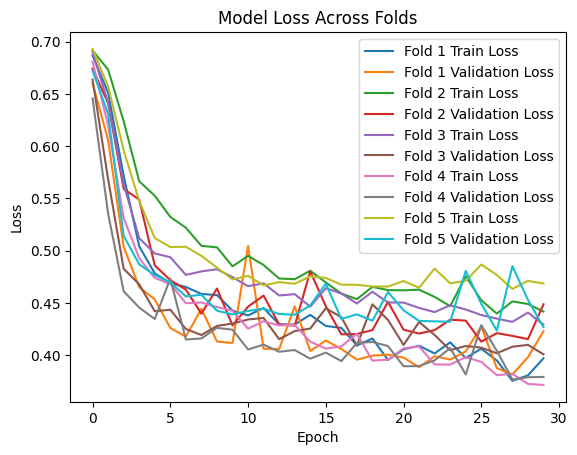

In [25]:
# Load the data (replace with actual loading code)
X = X_combined
y = y_combined

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Initialize lists to store metrics
f1_scores = []
histories = []

# Data augmentation using ImageDataGenerator for CNN training
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)

# Build the CNN feature extractor model
def create_cnn_feature_extractor():
    inputs = Input(shape=(48, 48, 1))
    
    # Convolutional Layer 1
    x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Layer 2
    x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Layer 3
    x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Flattening
    x = Flatten()(x)

    return Model(inputs, x)

# Build the DNN model
def create_dnn(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    
    return Model(inputs, outputs)

# Perform K-Fold Cross-Validation
fold = 1
for train_index, val_index in kf.split(X):
    print(f"Training on Fold {fold}...")
    
    # Split the data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Flatten the training data for RandomOverSampling
    X_train_flattened = X_train.reshape((X_train.shape[0], -1))
    
    # Apply RandomOverSampling to balance the training data
    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flattened, y_train)
    
    # Reshape the resampled data back to image shape
    X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], 48, 48, 1))
    
    # Shuffle the resampled training data
    X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)
    
    # Create CNN feature extractor
    cnn_feature_extractor = create_cnn_feature_extractor()
    cnn_features_train = cnn_feature_extractor.predict(X_train_resampled)
    cnn_features_val = cnn_feature_extractor.predict(X_val.reshape(X_val.shape[0], 48, 48, 1))
    
    # Ensure that the features are flattened before feeding to DNN
    cnn_features_train = cnn_features_train.reshape((cnn_features_train.shape[0], -1))  # Flatten the features
    cnn_features_val = cnn_features_val.reshape((cnn_features_val.shape[0], -1))  # Flatten the features
    
    # Create the DNN model
    dnn_model = create_dnn(cnn_features_train.shape[1:])
    
    # Compile the DNN model
    dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the DNN model without data augmentation
    history = dnn_model.fit(
        cnn_features_train, y_train_resampled,
        validation_data=(cnn_features_val, y_val),
        epochs=30,
        batch_size=32
    )
    
    # Append the training history for later analysis
    histories.append(history.history)
    
    # Evaluate the DNN model
    val_preds = dnn_model.predict(cnn_features_val)
    val_preds = np.round(val_preds)  # Convert probabilities to binary 0 or 1

    # Calculate and store the F1 score
    f1 = f1_score(y_val, val_preds)
    f1_scores.append(f1)

    print(f"F1 Score for Fold {fold}: {f1}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, val_preds)
    print(f"Confusion Matrix for Fold {fold}:\n", conf_matrix)

    # Increment fold number
    fold += 1

# Print average F1 score
print(f"\nAverage F1 Score: {np.mean(f1_scores)}")

# Plot accuracy and loss curves
for i, history in enumerate(histories):
    plt.plot(history['accuracy'], label=f'Fold {i+1} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'Fold {i+1} Validation Accuracy')
plt.title('Model Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

for i, history in enumerate(histories):
    plt.plot(history['loss'], label=f'Fold {i+1} Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {i+1} Validation Loss')
plt.title('Model Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
